In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
titanic= pd.read_csv('/content/tested.csv')
titanic

,PassengerId,Unnamed: 1,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
titanic.head()

,PassengerId,Unnamed: 1,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
titanic['Sex'].unique()

array([1, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic['Sex']= labelencoder.fit_transform(titanic['Sex'])

titanic.head()

,PassengerId,Unnamed: 1,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,NaN,3,"Kelly, Mr. James",1,34.5,0,330911,7.8292,NaN,Q,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,0,363272,7.0000,NaN,S,1
2,894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,0,240276,9.6875,NaN,Q,0
3,895,NaN,3,"Wirz, Mr. Albert",1,27.0,0,315154,8.6625,NaN,S,0
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,3101298,12.2875,NaN,S,1


In [ ]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Unnamed: 1   0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          332 non-null    float64
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 39.3+ KB


In [ ]:
titanic.describe

<bound method NDFrame.describe of      PassengerId  Unnamed: 1  Pclass  \
0            892         NaN       3   
1            893         NaN       3   
2            894         NaN       2   
3            895         NaN       3   
4            896         NaN       3   
..           ...         ...     ...   
413         1305         NaN       3   
414         1306         NaN       1   
415         1307         NaN       3   
416         1308         NaN       3   
417         1309         NaN       3   

                                             Name  Sex   Age  Parch  \
0                                Kelly, Mr. James    1  34.5      0   
1                Wilkes, Mrs. James (Ellen Needs)    0  47.0      0   
2                       Myles, Mr. Thomas Francis    1  62.0      0   
3                                Wirz, Mr. Albert    1  27.0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0  22.0      1   
..                                            ...  ...   ..

In [ ]:
titanic.isnull().sum()

PassengerId      0
Unnamed: 1     418
Pclass           0
Name             0
Sex              0
Age             86
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [ ]:
titanic.mean()

<ipython-input-43-8ae3c0fb77e5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.mean()


PassengerId    1100.500000
Unnamed: 1             NaN
Pclass            2.265550
Sex               0.636364
Age              30.272590
Parch             0.392344
Fare             35.627188
Survived          0.363636
dtype: float64

In [ ]:
titanic.median()

<ipython-input-44-30f6a299142a>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.median()


PassengerId    1100.5000
Unnamed: 1           NaN
Pclass            3.0000
Sex               1.0000
Age              27.0000
Parch             0.0000
Fare             14.4542
Survived          0.0000
dtype: float64

In [ ]:
x = titanic['Age']
y = titanic['Survived']
r = np.corrcoef(x, y)
r

array([[nan, nan],
       [nan,  1.]])

In [ ]:
x = np.array([1,3,5,7,8,9, 10, 15])
y = np.array([10, 20, 30, 40, 50, 60, 70, 80])
r = np.corrcoef(x, y)
r

array([[1.        , 0.97489441],
       [0.97489441, 1.        ]])

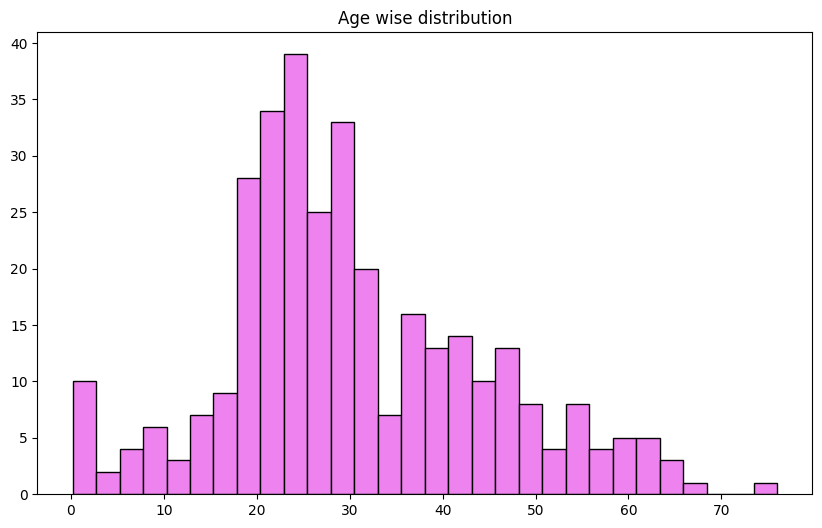

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'], bins=30, color='violet', edgecolor='black')
plt.title('Age wise distribution')
plt.show()


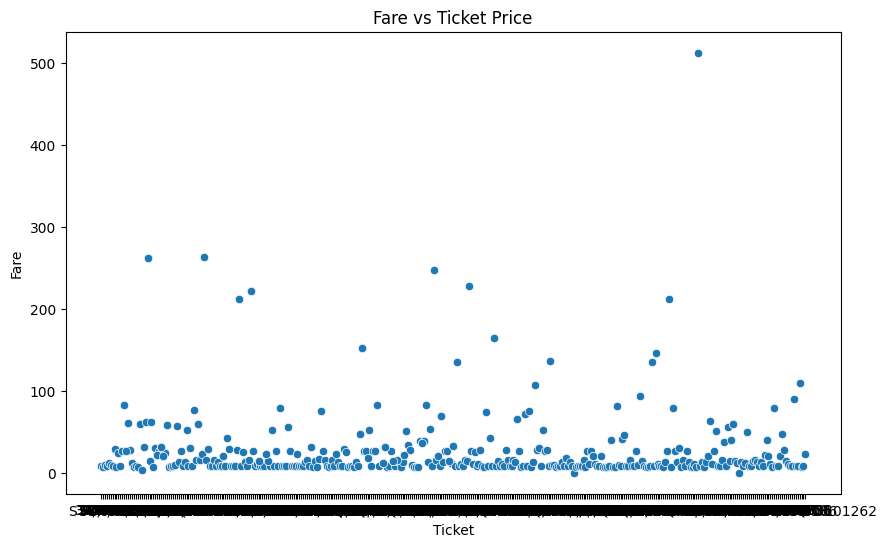

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ticket', y='Fare', data=titanic)
plt.title('Fare vs Ticket Price')
plt.show()


In [ ]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,1.0
1,0.0


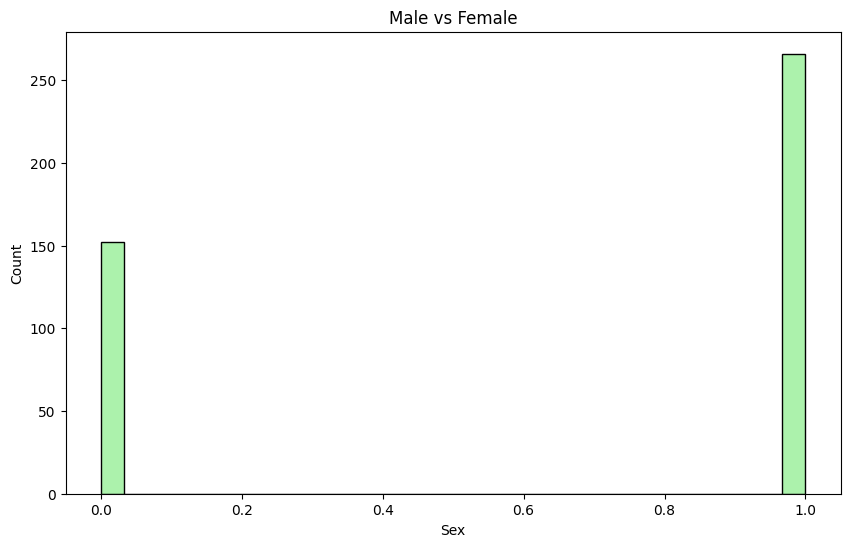

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Sex'], bins=30, color='lightgreen')
plt.title('Male vs Female')
plt.show()


Text(0.5, 1.0, 'Survived by Gender')

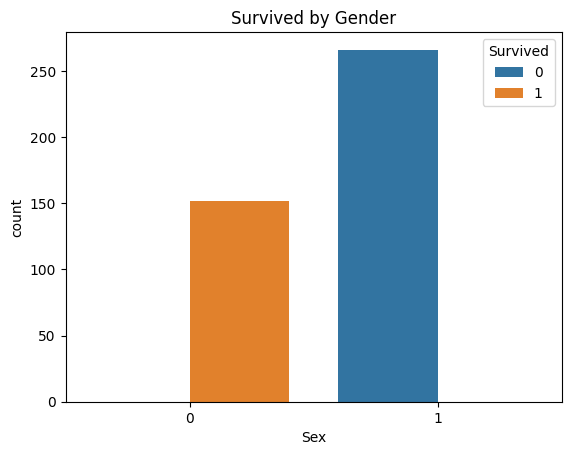

In [ ]:
sns.countplot(x=titanic['Sex'], hue=titanic["Survived"])
plt.title('Survived by Gender')

<Axes: xlabel='Survived', ylabel='count'>

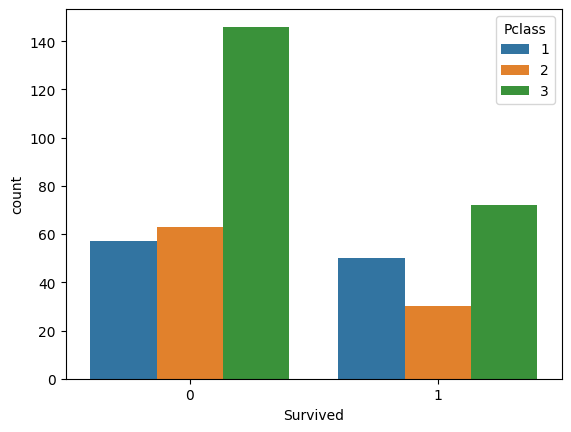

In [ ]:
sns.countplot(x=titanic['Survived'], hue=titanic['Pclass'])

<Axes: xlabel='Sex', ylabel='PassengerId'>

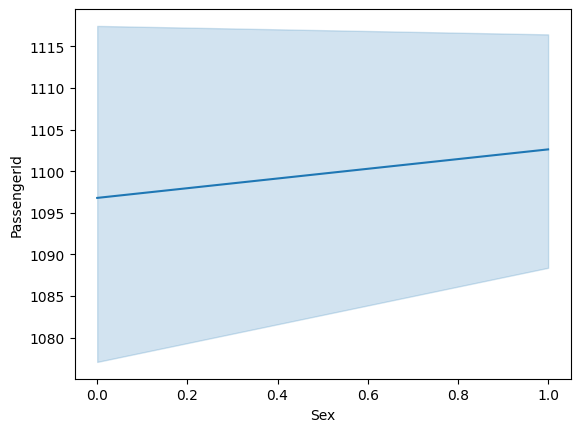

In [ ]:
sns.lineplot(x='Sex', y='PassengerId', data=titanic)

In [ ]:

X= titanic[['Pclass', 'Sex']]
Y=titanic['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
pred = print(log.predict(X_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [ ]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


In [ ]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[5,7]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

So Sorry! Not Survived
